In [5]:
from brownian import BrownianParticle, Particles
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
plt.style.use("science")

ModuleNotFoundError: No module named 'seaborn'

In [2]:
def potential_gradient(x: float, A = 0, k = 0.001):
    return -k * x + 4 * A * x**3

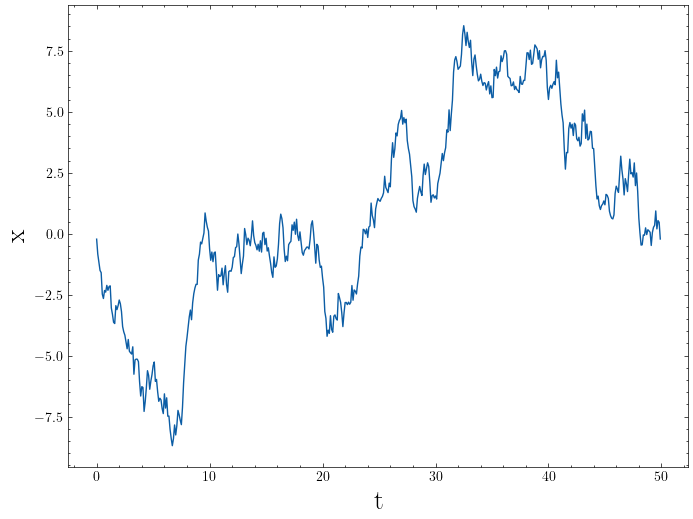

In [3]:

particle = BrownianParticle(1)
plt.figure(figsize=(8, 6))
times, positions = particle.diffuse(time=50, dt=0.1, force = False)
plt.plot(times, positions)
plt.xlabel("t", fontsize=20)
plt.ylabel("x", fontsize=20)
plt.show()


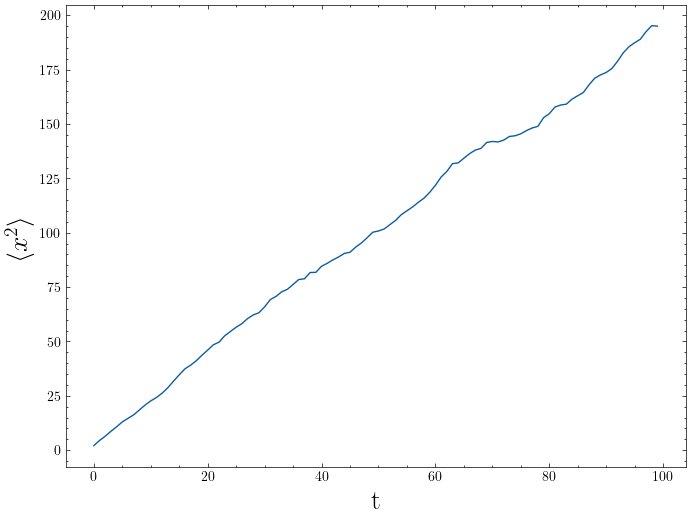

In [4]:
particles = Particles(1000, force = False)
times, _ = particles.diffuse(time=100, dt=1)
mean_square_positions = particles.mean_square_x()
plt.figure(figsize=(8, 6))
plt.plot(times[0], mean_square_positions)
plt.ylabel(r"$ \langle x^2 \rangle $", fontsize=20)
plt.xlabel("t", fontsize=20)
plt.show()

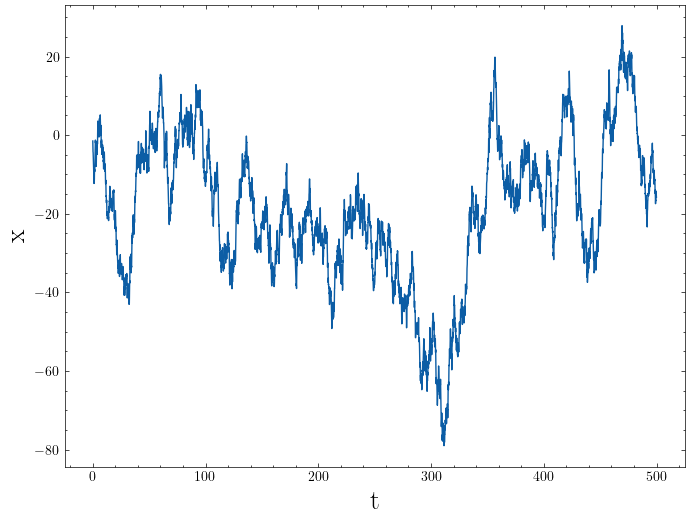

In [5]:
particle = BrownianParticle(m = 1)

plt.figure(figsize=(8, 6))
times, positions = particle.diffuse(time=500, dt=0.1, force = potential_gradient, T = 10)
plt.plot(times, positions)
plt.xlabel("t", fontsize=20)
plt.ylabel("x", fontsize=20)
plt.show("positions")


In [6]:
particles = Particles(1000, force = potential_gradient, T = 1)
_, all_positions = particles.diffuse(time=100, dt=0.01)
last_positions_1 = [positions[-1] for positions in all_positions]

particles = Particles(1000, force = potential_gradient, T = 5)
_, all_positions = particles.diffuse(time=100, dt=0.01)
last_positions_2 = [positions[-1] for positions in all_positions]

particles = Particles(1000, force = potential_gradient, T = 15)
_, all_positions = particles.diffuse(time=100, dt=0.01)
last_positions_3 = [positions[-1] for positions in all_positions]

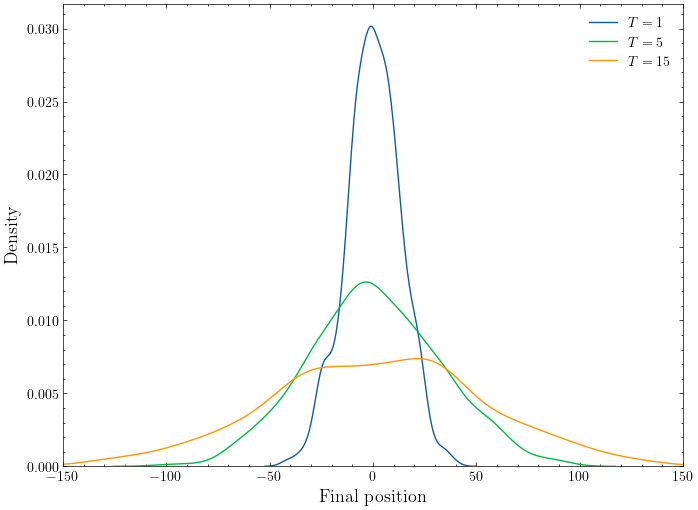

In [7]:
plt.figure(figsize=(8,6))
sns.kdeplot(last_positions_1, label = "$T=1$")
sns.kdeplot(last_positions_2, label = "$T=5$")
sns.kdeplot(last_positions_3, label = "$T=15$")
plt.xlabel("Final position", fontsize=13)
plt.ylabel("Density", fontsize=13)
plt.legend()
plt.xlim(-150, 150)
plt.show()


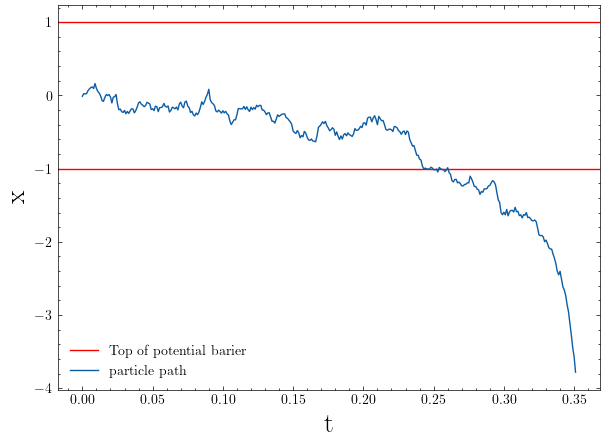

In [8]:
def potential_gradient(x: float, A = 1, k = 1):
    return -k * x + 4 * A * x**3

particle = BrownianParticle(m=1)
times, positions = particle.diffuse(time = 10, dt = 0.001, force=potential_gradient, max_x = 4)
plt.figure(figsize=(7, 5))
plt.axhline(1, color = "red")
plt.axhline(-1, color = "red", label = "Top of potential barier")
plt.plot(times, positions, label = "particle path")
plt.xlabel("t", fontsize=20)
plt.ylabel("x", fontsize=20)
plt.legend()
plt.show("positions")



In [15]:
def potential_gradient(x: float, A = 1, k = 1):
    return -k * x + 4 * A * x**3

particles = Particles(10000, potential_gradient, T=1)
all_times, positions = particles.diffuse(time = 100, dt = 0.001, max_x = 1)
last_times = [times[-1] for times in all_times]


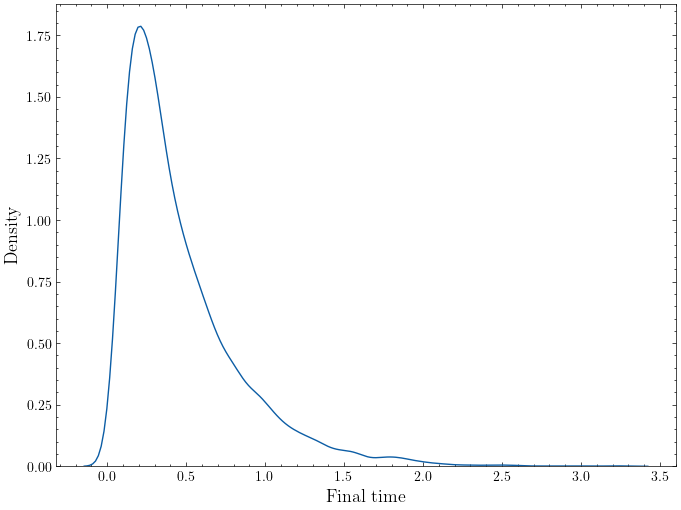

In [16]:
plt.figure(figsize=(8,6))
sns.kdeplot(last_times)
plt.xlabel("Final time", fontsize=13)
plt.ylabel("Density", fontsize=13)
#plt.legend()
#plt.xlim(-150, 150)
plt.show()